In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [57]:
val_df = pd.read_csv(
    "../../data/02/features_3sec-1sec/3-1_val_df.csv", index_col=0)

y_val = val_df['genre']
x_val = val_df.drop(columns=['genre', 'filename'])

def model_assess(model, title="Default"):
    model.fit(X, y)
    preds = model.predict(x_val)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_val, preds), 5))
    print('F1 score', title, ':', f1_score(y_val, preds, average="weighted"), '\n')


FileNotFoundError: [Errno 2] No such file or directory: '../../data/02/features_3sec-1sec/3-1_val_df.csv'

In [ ]:
mean_cols = [col for col in df_out.columns if 'mean' in col]
f_means = X[mean_cols]
var_cols = [col for col in df_out.columns if 'var' in col]
f_vars = X[var_cols]

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=38)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=10, 
    random_state=0
)
model_assess(rforest, "Random Forest")

# Support Vector Machine ovr
svm = SVC(decision_function_shape="ovr")
model_assess(svm, "Support Vector Machine ovr")

# Support Vector Machine ovo
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine ovo")

# Logistic Regression
lg = LogisticRegression(
    random_state=0, 
    solver='lbfgs',
    multi_class='multinomial', 
    max_iter=10000
)
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(
    solver='adam', 
    alpha=1e-5,
    hidden_layer_sizes=(1000, 10), 
    random_state=1
)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(
    n_estimators=10000, 
    learning_rate=0.05, 
    eval_metric="mlogloss",
    objective='multi:softmax'
)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax', eval_metric="mlogloss",)
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.35508
F1 score Naive Bayes : 0.2942458779894707 

Accuracy Stochastic Gradient Descent : 0.21767
F1 score Stochastic Gradient Descent : 0.14947579349473114 

Accuracy KNN : 0.27697
F1 score KNN : 0.2719647471089257 

Accuracy Decission trees : 0.47749
F1 score Decission trees : 0.47083271763159806 

Accuracy Random Forest : 0.61705
F1 score Random Forest : 0.6126598566348528 

Accuracy Support Vector Machine ovr : 0.27364
F1 score Support Vector Machine ovr : 0.23612685074365544 

Accuracy Support Vector Machine ovo : 0.27364
F1 score Support Vector Machine ovo : 0.23612685074365544 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy Logistic Regression : 0.38604
F1 score Logistic Regression : 0.34645781010619786 

Accuracy Neural Nets : 0.10002
F1 score Neural Nets : 0.018190085465044126 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy Cross Gradient Booster : 0.66849
F1 score Cross Gradient Booster : 0.6669662932535649 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy Cross Gradient Booster (Random Forest) : 0.54442
F1 score Cross Gradient Booster (Random Forest) : 0.5444684889880802 



In [ ]:
# same with normalized data

def model_assess_scaled(model, X, x_val, y_val, title="Default"):
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    x_val = min_max_scaler.fit_transform(x_val)
    model.fit(X, y)
    preds = model.predict(x_val)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_val, preds), 5))
    print('F1 score', title, ':', round(f1_score(y_val, preds, average="weighted"), 5), '\n')
    #print('Confusion matrix\n', title, ':\n', confusion_matrix(y_val, preds), '\n')


In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess_scaled(nb, X, x_val, y_val, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess_scaled(sgd, X, x_val, y_val, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=38)
model_assess_scaled(knn, X, x_val, y_val, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess_scaled(tree, X, x_val, y_val, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(
    n_estimators=1000, max_depth=10, random_state=0)
model_assess_scaled(rforest, X, x_val, y_val, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovr")
model_assess_scaled(svm, X, x_val, y_val, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial', max_iter=10000)
model_assess_scaled(lg, X, x_val, y_val, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='adam', alpha=1e-5,
                   hidden_layer_sizes=(5000, 10), random_state=1)
model_assess_scaled(nn, X, x_val, y_val, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=10000, learning_rate=0.05,
                    objective='multi:softmax')
model_assess_scaled(xgb, X, x_val, y_val, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax')
model_assess_scaled(xgbrf, X, x_val, y_val,
                    "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.40319
F1 score Naive Bayes : 0.36899 

Accuracy Stochastic Gradient Descent : 0.47035
F1 score Stochastic Gradient Descent : 0.47353 

Accuracy KNN : 0.43487
F1 score KNN : 0.43248 

Accuracy Decission trees : 0.28054
F1 score Decission trees : 0.27149 

Accuracy Random Forest : 0.52917
F1 score Random Forest : 0.52581 

Accuracy Support Vector Machine : 0.52227
F1 score Support Vector Machine : 0.52474 

Accuracy Logistic Regression : 0.47892
F1 score Logistic Regression : 0.4808 

Accuracy Neural Nets : 0.5287
F1 score Neural Nets : 0.53148 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:40:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.46702
F1 score Cross Gradient Booster : 0.4571 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster (Random Forest) : 0.3639
F1 score Cross Gradient Booster (Random Forest) : 0.33932 



In [ ]:
X.shape, len(y)

((12411, 64), 12411)

### KNN elbow method

In [ ]:
error_rate = []
start = 1
end = 50
for i in range(start, end):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    pred_i = knn.predict(x_val)
    error_rate.append(np.mean(pred_i != y_val))


Best K : 27 with 0.71446 error rate


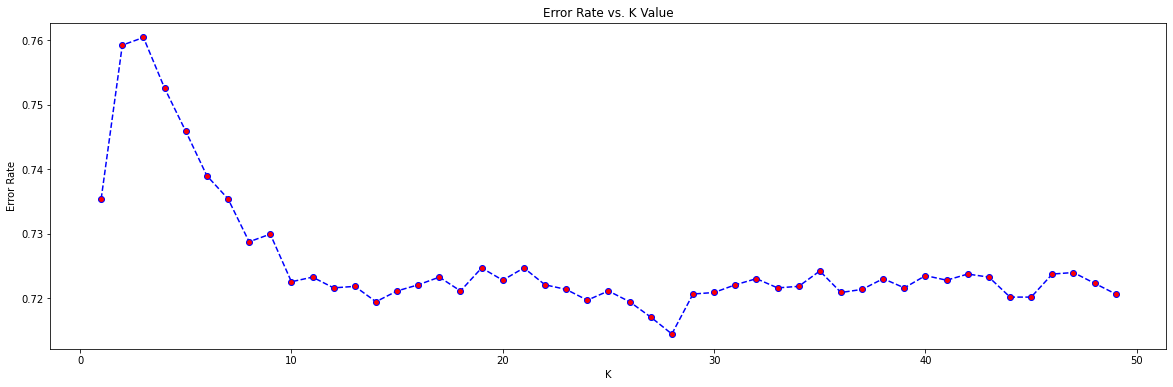

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(
    range(start, end), 
    error_rate, 
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='red', 
    markersize=6
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error_rate = min(error_rate)
best_k = error_rate.index(min_error_rate)
print(f"Best K : {best_k} with {round(min_error_rate, 5)} error rate")


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
model_assess_scaled(knn, X, x_val, y_val, "KNN")


Accuracy KNN : 0.43749
F1 score KNN : 0.43562 



# Pycaret

In [1]:
import pandas as pd
train_df = pd.read_csv("../../data/02/30-30/30-30_train_df.csv", index_col=0)
test_df = pd.read_csv("../../data/02/30-30/30-30_test_df.csv", index_col=0)
train_df.head(1)

,bandwidth_mean,bandwidth_var,cen10_mean,cen10_var,cen11_mean,cen11_var,cen12_mean,cen12_var,cen1_mean,cen1_var,...,tonnetz3_var,tonnetz4_var,tonnetz5_var,tonnetz_0_mean,tonnetz_1_mean,tonnetz_2_mean,tonnetz_3_mean,tonnetz_4_mean,tonnetz_5_mean,zero_crossings
0,2313.040051,48964.354802,0.330168,0.011751,0.296965,0.010898,0.216865,0.008623,0.274341,0.009945,...,0.010974,0.001158,0.001157,0.035804,0.051132,0.021201,-0.032273,0.01158,0.009032,40465.0


In [2]:
import pycaret.classification as cl
import xgboost

clf1 = cl.setup(
    data=train_df, 
    target='genre', 
    test_data=test_df, 
    fold_strategy="stratifiedkfold", 
    fold=3, 
    feature_selection=True,
    feature_selection_threshold=0.4,
    feature_interaction=True,
    feature_ratio=True,
    feature_selection_method="boruta",
    use_gpu=True,
    train_size=1., 
    normalize=True
)


,Description,Value
0,session_id,8709
1,Target,genre
2,Target Type,Multiclass
3,Label Encoded,"blues: 0, classical: 1, country: 2, disco: 3, hiphop: 4, jazz: 5, metal: 6, pop: 7, reggae: 8, rock: 9"
4,Original Data,"(794, 118)"
5,Missing Values,False
6,Numeric Features,116
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = cl.compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7859,0.9715,0.7856,0.7859,0.7837,0.7621,0.7625,10.5367
catboost,CatBoost Classifier,0.7721,0.9716,0.7718,0.7760,0.7715,0.7467,0.7473,387.2500
xgboost,Extreme Gradient Boosting,0.7532,0.9630,0.7529,0.7515,0.7506,0.7257,0.7261,27.3700
et,Extra Trees Classifier,0.7531,0.9577,0.7530,0.7632,0.7506,0.7257,0.7273,0.8700
rf,Random Forest Classifier,0.7154,0.9517,0.7150,0.7247,0.7155,0.6838,0.6847,1.0867
gbc,Gradient Boosting Classifier,0.7153,0.9463,0.7149,0.7224,0.7146,0.6837,0.6845,92.4733
dt,Decision Tree Classifier,0.4925,0.7180,0.4928,0.4984,0.4927,0.4361,0.4366,0.3333
lda,Linear Discriminant Analysis,0.4370,0.7624,0.4373,0.4580,0.4369,0.3745,0.3769,0.3467
lr,Logistic Regression,0.3502,0.6650,0.3501,0.3523,0.3456,0.2779,0.2788,11.2633
nb,Naive Bayes,0.3175,0.6481,0.3174,0.3284,0.3159,0.2415,0.2425,0.0633
